<a href="https://colab.research.google.com/github/comp-lin-alg/CLA_colab/blob/main/pow_and_rq_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import *

In [2]:
A = random.randn(50,50)

In [4]:
A = 0.5*(A + A.T); linalg.norm(A-A.T)

0.0

In [7]:
e, v = linalg.eig(A)

In [10]:
ll = e[5]; vv = v[:,5]

In [11]:
linalg.norm(A@vv - ll*vv)

2.3901882236077556e-14

In [12]:
r = random.randn(50)

In [14]:
epsilon = 10.**(-arange(5)); epsilon

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04])

In [20]:
ee_est = zeros_like(epsilon)

In [23]:
for i in range(epsilon.size):
  vpert = vv + epsilon[i]*r
  ee_est[i] = vpert.dot(A@vpert)/vpert.dot(vpert)

In [24]:
import matplotlib.pyplot as pp

In [25]:
ee_err = abs(ee_est-ll)

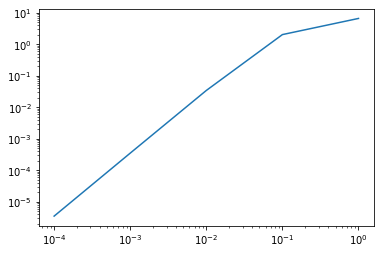

In [29]:
pp.loglog(epsilon, ee_err)

In [ ]:
def pow_it(A, x0, tol):
  x = x0.copy()
  residual = 1.0e100
  its = 0
  while residual > tol:
    its += 1
    x = A@x
    x = x/(x.dot(x)**0.5)
    rq = x.dot(A@x)
    residual = linalg.norm(A@x-rq*x)
    print(rq)
  return x, rq, its

In [ ]:
A3 = array([[ 0.76505141, -0.03865876,  0.42107996],
                    [-0.03865876,  0.20264378, -0.02824925],
                   [ 0.42107996, -0.02824925,  0.23330481]]); A3

In [ ]:
B3 = array([[ 0.76861909,  0.01464606,  0.42118629],
                     [ 0.01464606,  0.99907192, -0.02666057],
                     [ 0.42118629, -0.02666057,  0.23330798]]); B3

In [ ]:
x = random.randn(3); x

In [113]:
v, ee, nits = pow_it(A3, x, 1.0e-6)

0.9992897060823254 0.8763906825056801
0.99997166403822 0.8744123992523604
0.999998866153466 0.8741085479610124
0.9999999542765041 0.8740455504558923
0.999999997801489 0.8740328559903101
0.9999999995424889 0.8740303132929889
0.9999999996121288 0.8740298046013439
0.9999999996149143 0.8740297028569258


In [114]:
v, ee, nits = pow_it(B3, x, 1.0e-6)

0.9999975204903312 0.8750941759398941
0.9999999759996009 0.8743414965053524
0.9999999760020972 0.8743407516697701


Try 1.0e-7!

In [105]:
eA, _ = linalg.eig(A3); eA

array([1.00000000e+00, 9.99995908e-04, 2.00000004e-01])

In [106]:
eB, _ = linalg.eig(B3); eB

array([9.99995858e-04, 9.99999997e-01, 9.99998997e-01])

In [116]:
def rq_it(A, x0, l0, tol):
  x = x0.copy()
  residual = 1.0e100
  its = 0
  rq = l0
  while residual > tol:
    its += 1
    x = linalg.solve(A - rq*eye(3), x)
    x = x/(x.dot(x)**0.5)
    rq = x.dot(A@x)
    residual = linalg.norm(A@x-rq*x)
    print(rq)
  return x, rq, its

In [119]:
v, ee, nits = rq_it(A3, x, 0.8, 1.0e-8)

0.862718939550646
0.995940921941864
0.999999930987702
0.9999999996150299


In [123]:
eA - ee

array([ 2.83096724e-09, -9.99000001e-01, -7.99999992e-01])

In [120]:
v, ee, nits = rq_it(B3, x, 0.8, 1.0e-8)

0.8666774321065125
0.9963639715992977
0.9999999272943177
0.9999999966654998
0.9999999967840627


In [122]:
eB - ee

array([-9.99000001e-01, -1.11022302e-16, -9.99425976e-07])